<a href="https://colab.research.google.com/github/CaptaiN785/ML-Notebooks/blob/main/Feature-transformation/fearure_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## All type of feature transformations are:

1. Normalization and Standardization
2. Scalling to minimum and Maximum values
3. Scaling to median and quantiles
4. Gaussian Transform
5. Logarithmic Transformation
6. Reciprocal Transformation
7. Square root Transformation
8. Exponential Transformation
9. Box Cox Transformation


In [2]:
import seaborn as sns

titanic = sns.load_dataset('titanic')


In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df = titanic[['survived', 'pclass', 'age', 'fare']]
df.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [5]:
df.dropna(axis = 0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
df.shape

(714, 4)

In [7]:
df.isna().any()

survived    False
pclass      False
age         False
fare        False
dtype: bool

### Standard Scaler

* Formula for changing is: 

<img src = "https://miro.medium.com/max/780/1*kxS78PFEiDXq0slix6a5xA.png" >

* Here in robust scaler:<br>

    Q1 => 1st quantile or 25 precentile
    Q3 => 3rd quantile or 75 percentile

    * In Numerator Q1(x) is median of data in that column

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled = scaler.fit_transform(df)
scaled

array([[-0.82702011,  0.91123237, -0.53037664, -0.51897787],
       [ 1.20916044, -1.47636364,  0.57183099,  0.69189675],
       [ 1.20916044,  0.91123237, -0.25482473, -0.50621356],
       ...,
       [ 1.20916044, -1.47636364, -0.73704057, -0.08877362],
       [ 1.20916044, -1.47636364, -0.25482473, -0.08877362],
       [-0.82702011,  0.91123237,  0.15850313, -0.50952283]])

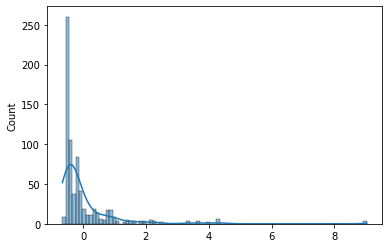

In [14]:
sns.histplot(scaled[:, -1], kde = True)

### Min max scaler 

In [11]:
from sklearn.preprocessing import MinMaxScaler

mn = MinMaxScaler()
mn_scaled = mn.fit_transform(df)
mn_scaled

array([[0.        , 1.        , 0.27117366, 0.01415106],
       [1.        , 0.        , 0.4722292 , 0.13913574],
       [1.        , 1.        , 0.32143755, 0.01546857],
       ...,
       [1.        , 0.        , 0.23347575, 0.0585561 ],
       [1.        , 0.        , 0.32143755, 0.0585561 ],
       [0.        , 1.        , 0.39683338, 0.01512699]])

In [12]:
## It is unable to change binary category

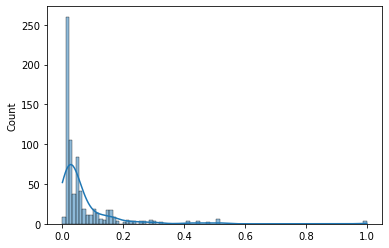

In [15]:
sns.histplot(mn_scaled[:, -1], kde = True)

### Robust scaler

1. It is more robust to outliers
2. Because it use the quantiles and median of data

In [13]:
from sklearn.preprocessing import RobustScaler

rb = RobustScaler()
rb_scaled = rb.fit_transform(df)
rb_scaled

array([[ 0.        ,  0.5       , -0.33566434, -0.33530898],
       [ 1.        , -0.5       ,  0.55944056,  2.19315301],
       [ 1.        ,  0.5       , -0.11188811, -0.30865548],
       ...,
       [ 1.        , -0.5       , -0.5034965 ,  0.56301283],
       [ 1.        , -0.5       , -0.11188811,  0.56301283],
       [ 0.        ,  0.5       ,  0.22377622, -0.31556565]])

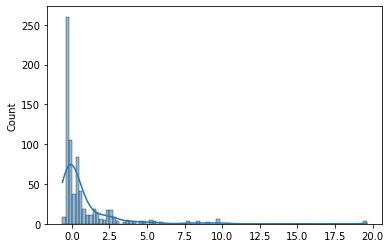

In [16]:
sns.histplot(rb_scaled[:, -1], kde = True)

### Gaussian transformation

#### Following will help to get gaussian transformation
    1. Logarithmic Transformation
    2. Reciprocal Transformation
    3. Square root transformation
    4. Exponential transformation
    5. Box Cox transformation

In [18]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

In [19]:
def plot_data(df, feature):
    plt.figure(figsize = (10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist = 'norm', plot = pylab)
    plt.show()

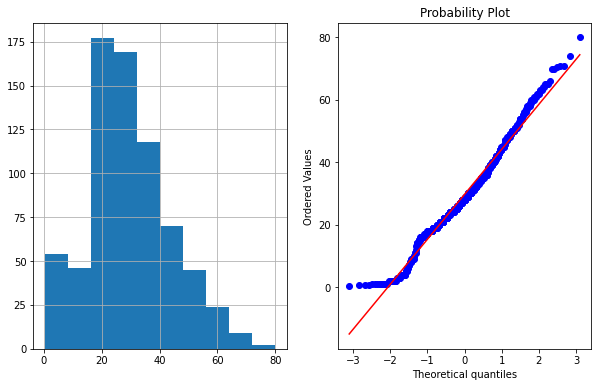

In [20]:
plot_data(df, 'age')

In [21]:
## Most of data is falling on straight line ie. it is mostly to gaussian distribution

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


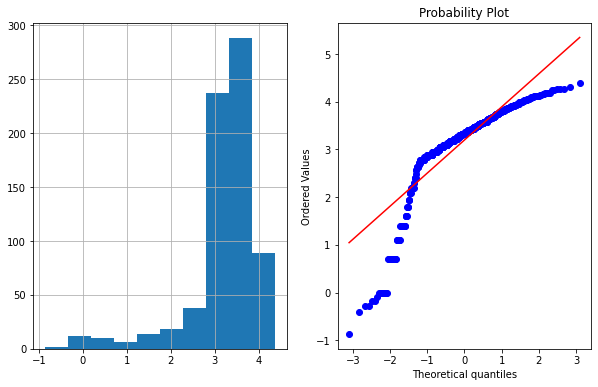

In [22]:
## Log transformation
import numpy as np

df['age_log'] = np.log(df['age'])
plot_data(df, 'age_log')


In [23]:
## Here not more data are falling on straight line so we can ignore it.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


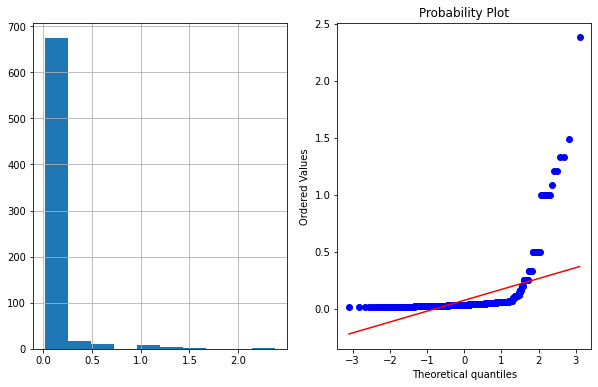

In [24]:
## Reciprocal transformation

df['age_rec'] = 1/df['age']
plot_data(df, 'age_rec')

In [25]:
## It is also not following better

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


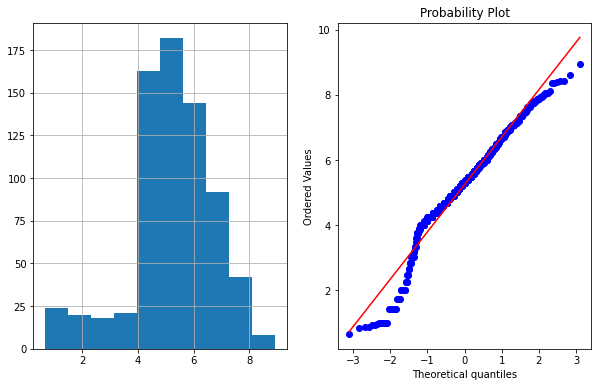

In [26]:
## Square root transformation

df['age_sqrt'] = df['age']**0.5

plot_data(df, 'age_sqrt')


In [27]:
## It is a little bit good result but it is also left skewed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


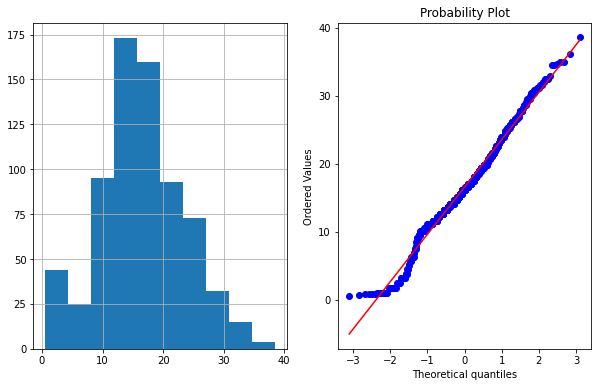

In [32]:
## Exponential transformation
df['age_exp'] = df['age']**(1/1.2)
plot_data(df, 'age_exp')


In [33]:
## It is giving the better result
## Most of points are falling on straight lines
## And graph distribution is also showing some gaussian nature

### BoxCox transformation
It is defined as<br>
<hr>
T(Y) = (Y exp(lembda) - 1)/(lembda)

* here Y is the response variable and lembda is transformation parameter.

* lambda varies from -5 to 5.
* In the transformation, all values of lambda is considered and optimal value for a given vairable is selected.


In [34]:
df['age_boxcox'], parameters = stat.boxcox(df['age'])
print(parameters)

0.7627890912077443


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


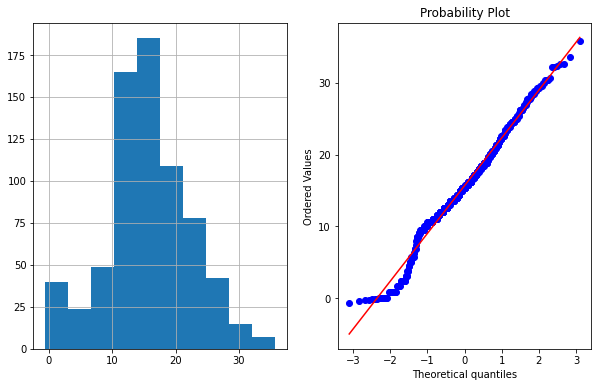

In [35]:
plot_data(df, 'age_boxcox')

In [ ]:
## It is also giving the good result here. 